In [758]:
# import random
# import re
# import numpy as np
# import tensorflow as tf
from skimage.transform import resize
# from skimage import measure
# from skimage.measure import regionprops
import matplotlib.patches as patches
import matplotlib.pyplot as plt

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops, shannon_entropy
from skimage.morphology import closing, square
from skimage.color import label2rgb
from skimage.io import imread

import cv2
import pytesseract
pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

from CarPlate import GetPlate 

(749, 999)


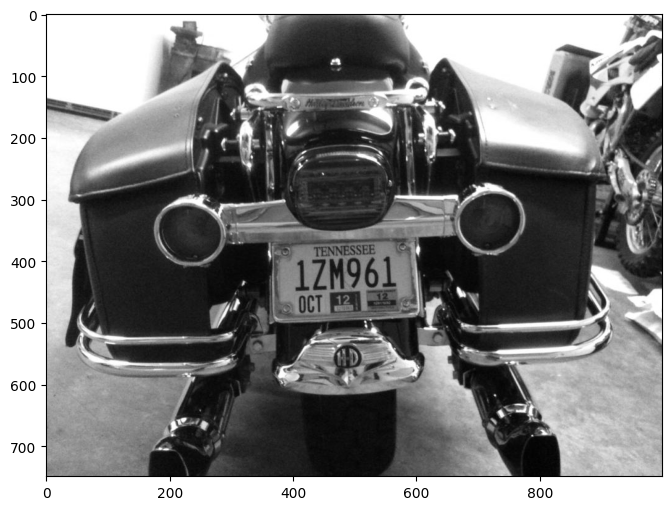

In [759]:
# car_image = imread('../data_jpg/05.jpeg', as_gray=True)
# car_image = imread('whitecar.png', as_gray=True)
# car_image = imread('../data/d12.png', as_gray=True)
car_image = imread('../data/21.png', as_gray=True)
print(car_image.shape)
# print(shannon_entropy(car_image))

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(car_image, cmap="gray")
plt.show()

In [760]:
plate_objects = GetPlate(car_image, False)
print(f"total plates: {len(plate_objects)}, plate[0]: {plate_objects[0].shape}")

total plates: 4, plate[0]: (139, 342)


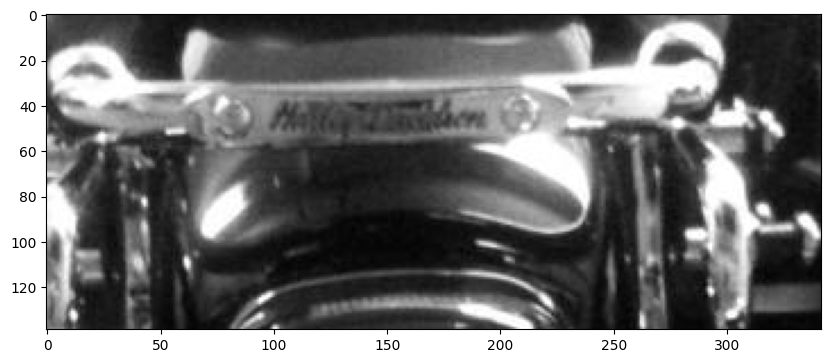

In [761]:
image = plate_objects[0]
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image, cmap="gray")
# ax.set_axis_off()
plt.show()

In [762]:
# text = pytesseract.image_to_string(image, lang="eng")
# print(f"{len(text)=};  text='{text}'")

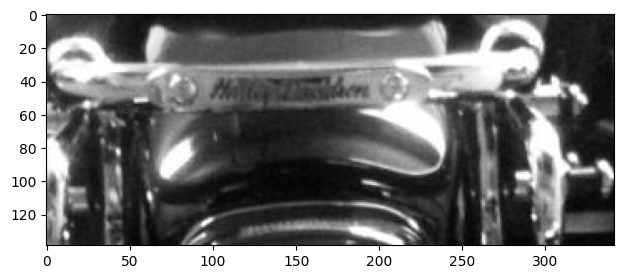

In [763]:
# def GetChars(image, show = False):
# plate = cv2.resize(image, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_CUBIC)
plate = image
thresh = threshold_otsu(plate)

fig, ax = plt.subplots(figsize=(10, 3))
ax.imshow(plate, cmap="gray")
# ax.set_axis_off()
plt.show()

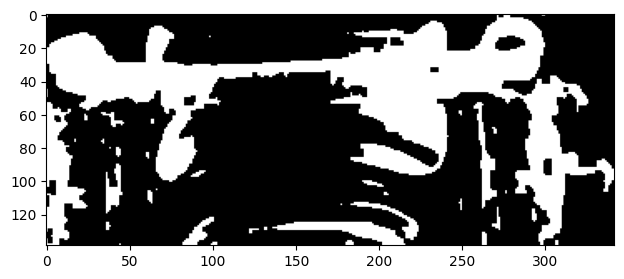

In [764]:
bw = closing(plate > thresh, square(3))

fig, ax = plt.subplots(figsize=(10, 3))
ax.imshow(bw, cmap="gray")
# ax.set_axis_off()
plt.show()

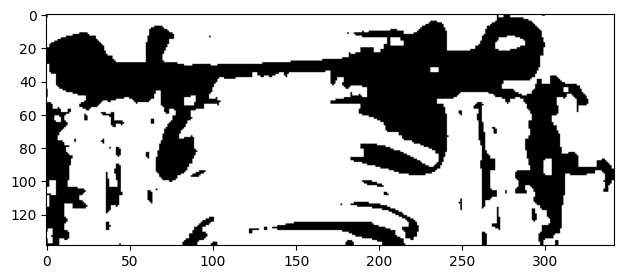

In [765]:
# cleared = clear_border(bw)
# cv2.bitwise_not(bw, cleared)
invert = 255 - bw
# invert = 255 - plate

fig, ax = plt.subplots(figsize=(10, 3))
ax.imshow(invert, cmap="gray")
# ax.set_axis_off()
plt.show()

# regionprops

In [766]:
# label_img = label(img, connectivity=img.ndim)
label_image = label(invert)
# label_image = label(cleared)
print(f"{plate.shape=}  {label_image.shape=}")

regions = [region for region in regionprops(label_image)]
print(f"total regions: {len(regions)}")

plate.shape=(139, 342)  label_image.shape=(139, 342)
total regions: 55


In [767]:
for r in regions:
    y0, x0, y1, x1 = r.bbox
    region_height = y1 - y0
    region_width = x1 - x0
    print(f"{x0=:3} : {x1=:3} ,  {y0=:3} : {y1=:3} | {region_height=:3}  {region_width=:3} | {r.area:7}")

x0=  0 : x1=  1 ,  y0=  0 : y1=  2 | region_height=  2  region_width=  1 |     2.0
x0=  0 : x1=271 ,  y0=  0 : y1= 31 | region_height= 31  region_width=271 |  5719.0
x0=  0 : x1=342 ,  y0=  0 : y1=139 | region_height=139  region_width=342 | 12242.0
x0=272 : x1=275 ,  y0=  0 : y1=  2 | region_height=  2  region_width=  3 |     6.0
x0=274 : x1=342 ,  y0=  0 : y1= 93 | region_height= 93  region_width= 68 |  3488.0
x0=298 : x1=300 ,  y0=  0 : y1=  1 | region_height=  1  region_width=  2 |     2.0
x0=181 : x1=182 ,  y0= 11 : y1= 12 | region_height=  1  region_width=  1 |     1.0
x0= 98 : x1= 99 ,  y0= 13 : y1= 14 | region_height=  1  region_width=  1 |     1.0
x0=270 : x1=288 ,  y0= 13 : y1= 22 | region_height=  9  region_width= 18 |   121.0
x0=207 : x1=215 ,  y0= 14 : y1= 19 | region_height=  5  region_width=  8 |    36.0
x0=  0 : x1=303 ,  y0= 30 : y1=139 | region_height=109  region_width=303 | 21793.0
x0=231 : x1=236 ,  y0= 32 : y1= 35 | region_height=  3  region_width=  5 |    15.0
x0=3

In [768]:
min_height, max_height = 0.5*plate.shape[0], 0.98*plate.shape[0]
# min_height, max_height = 0.75*plate.shape[0], 0.98*plate.shape[0]
min_width,  max_width  = 0.05*plate.shape[1], 0.15*plate.shape[1]
print(f"{min_height=}  {max_height=}  |  {min_width=}  {max_width=}  | min area={min_height * min_width}")

min_height=69.5  max_height=136.22  |  min_width=17.1  max_width=51.3  | min area=1188.45


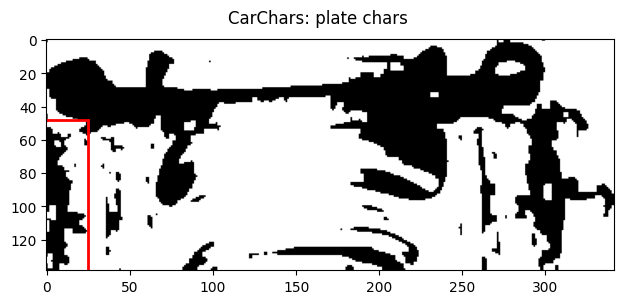

In [769]:
fig, ax1 = plt.subplots(figsize=(10, 3))
fig.suptitle("CarChars: plate chars")
ax1.imshow(invert, cmap="gray")

characters = []
column_list = []
delta = 5
for r in regions:
    if r.area < 40: 
        continue
    y0, x0, y1, x1 = r.bbox
    region_height = y1 - y0
    region_width = x1 - x0

    if (min_height < region_height < max_height) and (min_width < region_width < max_width): ## !!! ERROR: MUST Chaige IF ...
        # rect_border = patches.Rectangle((x0, y0), x1 - x0, y1 - y0, edgecolor="red", linewidth=2, fill=False)
        # rect_border = patches.Rectangle((x0, y0), region_width, region_height, edgecolor="red", linewidth=2, fill=False)
        rect_border = patches.Rectangle((x0-delta, y0-delta), region_width+delta, region_height+delta, edgecolor="red", linewidth=2, fill=False)
        ax1.add_patch(rect_border)

        # roi = invert[y0-delta:y1+delta, x0-delta:x1+delta]  # error
        roi = invert[y0:y1, x0:x1]
        resized_char = 255 - resize(roi, (20, 20))
        # resized_char = resize(roi, (20, 20))
        characters.append(resized_char)
        column_list.append(x0)

plt.show()

In [770]:
print(f"characters: {len(characters)},  columns: {column_list}")

characters: 1,  columns: [0]


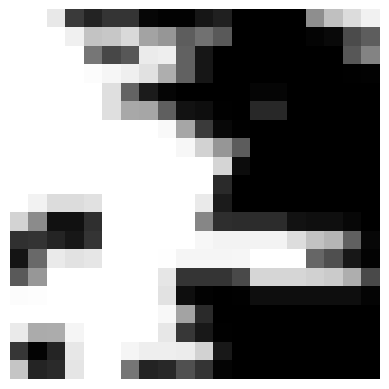

In [771]:
for i in range(len(characters)):
    plt.subplot(len(characters), 1,  i+1)
    # plt.subplot( 1, len(characters), i+1)
    plt.imshow(characters[i], cmap='gray')
    plt.axis('off')
plt.show()    

# 